# Análise de dados

### Grupo: Guilherme Barão, Iran Cruz Soares, Beatriz Evelbauer, Carlos Henrique

*Disciplina: Análise de Regressão*


---



Para este trabalho, escolhemos os dados do Happiness Index 2019, disponíveis em: https://www.kaggle.com/datasets/sougatapramanick/happiness-index-2018-2019

Escolhemos essa base pois nos interessamos pelos dados apresentados e ela parece ideal para realizar uma análise de regressão linear simples, com diversas variáveis numéricas quantitativas que parecem ser relacionadas e podem servir para análise. 

Nosso objetivo será analisar as informações disponíveis e realizar uma regressão linear simples entre uma das variáveis da tabela e a variável resposta *Score*, que representa a pontuação de felicidade de cada país. Essa variável será a variável resposta pois queremos analisar como os atributos de cada país influenciam a felicidade de sua população.

## Índice<a class='anchor' id='top'></a>
- [Importando Bibliotecas](#bibliotecas)📚
- [Analisando os Dados](#analise)🔍
- [Aplicando e interpretando a Regressão](#regressao)📈
- [Realizando previsões](#previsoes)🔮

## Importando Bibliotecas 📚 <a class='anchor' id='bibliotecas'></a> [↑](#top)

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Analisando os Dados 🔍<a class='anchor' id='analise'></a> [↑](#top)

No bloco abaixo, criamos uma classe para a análise exploratória etc etc

In [ ]:
class Exploratory_Analysis:

    def __init__(self, data):

        self.data = data

        self.describe = []
        for col in pd.DataFrame(self.data).columns:
            if pd.DataFrame(self.data[col]).dtypes[0] == 'object':
                self.describe.append([
                    pd.DataFrame(self.data[col]).dtypes[0],
                    pd.DataFrame(self.data[col]).isna().sum().sum(),
                    '--', '--', '--', '--', '--', '--'
                ])
            else:
                self.describe.append([
                    pd.DataFrame(self.data[col]).dtypes[0],
                    pd.DataFrame(self.data[col]).isna().sum().sum(),
                    min(self.data[col]),
                    np.quantile(self.data[col], 0.25),
                    np.mean(self.data[col]),
                    np.median(self.data[col]),
                    np.quantile(self.data[col], 0.75),
                    max(self.data[col])
                ])
        self.describe = pd.DataFrame(self.describe)
        self.describe.index = pd.DataFrame(self.data).columns
        self.describe.columns = ['dtype', 'nulls', 'min', '1st q', 'mean', 'median', '3st q', 'max']

        self.co_vars = []
        self.resp_var = []
        self.reg_vars = pd.DataFrame()
        self.corr_matrix = pd.DataFrame()

    def select_reg_vars(self, co_vars, resp_var):

        self.co_vars = co_vars
        self.resp_var = resp_var
        self.reg_vars = self.data[resp_var + co_vars]

    def set_corr_matrix(self):

        self.corr_matrix = self.reg_vars.corr()[self.resp_var][1:]

    def exp_graphics(self, rows, cols, size):
        
        fig, axs = plt.subplots(rows, cols, figsize=(size, size))
        counter = 0

        for i in range(rows):
            for j in range(cols):
                axs[i, j].scatter(
                    self.reg_vars[self.co_vars[counter]],
                    self.reg_vars[self.resp_var], 
                    alpha=0.5, 
                    color='blue'
                )
                axs[i, j].grid(linestyle='--')
                axs[i, j].spines['top'].set_visible(False)
                axs[i, j].spines['right'].set_visible(False)
                axs[i, j].set_xlabel(self.co_vars[counter])
                axs[i, j].set_ylabel('Score')
                counter += 1

        plt.show()
        plt.close()

    def corr_heatmap(self, height, width):

        plt.figure(figsize=(width, height))
        corr_plot = sns.heatmap(self.corr_matrix, annot=True, cmap="coolwarm", center=0, linewidth=0.8)
        corr_plot.xaxis.tick_top()
        plt.show()
        plt.close()

Importando os dados e gerando algumas estatísticas descritivas:

In [153]:
dados = pd.read_csv('https://raw.githubusercontent.com/guij2/analise_regressao/main/2019.csv')
display(dados.head())
print(' \n')
exp_analysis_obj = Exploratory_Analysis(dados)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(exp_analysis_obj.describe)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


,dtype,nulls,min,1st q,mean,median,3st q,max
Overall rank,int64,0,1,39.75,78.5,78.5,117.25,156
Country or region,object,0,--,--,--,--,--,--
Score,float64,0,2.853,4.5445,5.407096,5.3795,6.1845,7.769
GDP per capita,float64,0,0.0,0.60275,0.905147,0.96,1.2325,1.684
Social support,float64,0,0.0,1.05575,1.208814,1.2715,1.4525,1.624
Healthy life expectancy,float64,0,0.0,0.54775,0.725244,0.789,0.88175,1.141
Freedom to make life choices,float64,0,0.0,0.308,0.392571,0.417,0.50725,0.631
Generosity,float64,0,0.0,0.10875,0.184846,0.1775,0.24825,0.566
Perceptions of corruption,float64,0,0.0,0.047,0.110603,0.0855,0.14125,0.453


Parece razoável interpretar
- GDP per capita;
- Social support; 
- Healthy life expectancy; 
- Freedom to make life choices; 
- Generosity, e
- Perceptions of corruption

Como as possíveis varíaveis independentes do modelo, por serem índices de cada país que podem estar relacionados com a felicidade da população. "Country or region" não fornece informações quantitativas, e "Overall rank" vem da nossa variável resposta.

In [ ]:
co_vars = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]
resp_var = ['Score']
reg_vars = pd.DataFrame(dados[co_vars + resp_var])
exp_analysis_obj.select_reg_vars(co_vars, resp_var)
exp_analysis_obj.set_corr_matrix()

Gerando scatterplots comparando cada possível covariável com a variável resposta "Score":

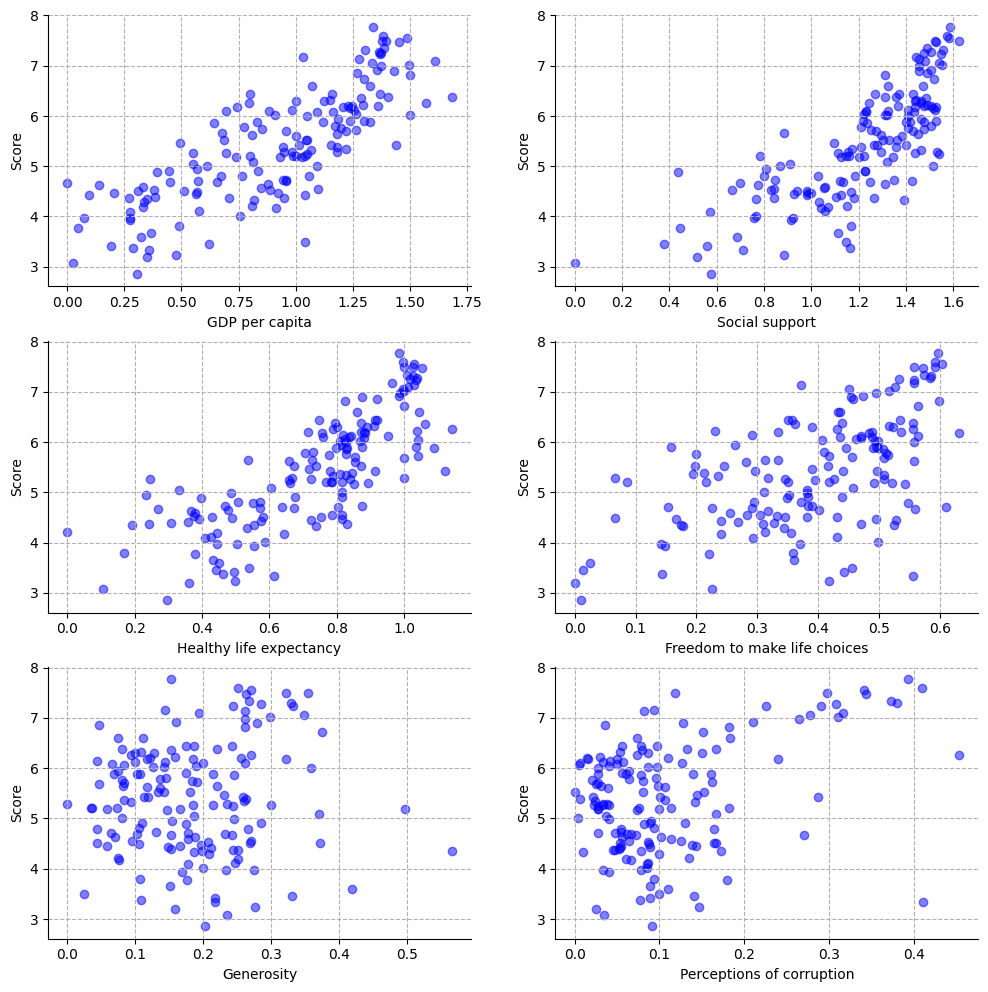

In [ ]:
exp_analysis_obj.exp_graphics(3, 2, 12)

Gerando um gráfico com as correlações entre as possíveis covariáveis e a variável resposta:

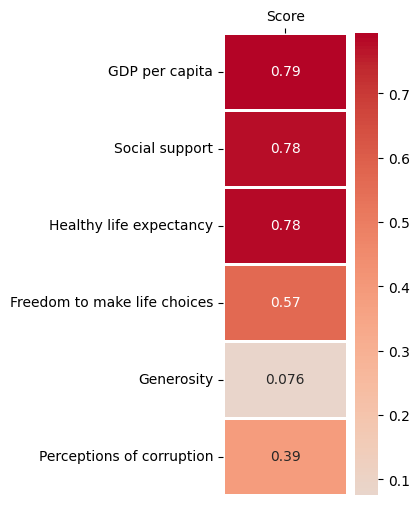

In [ ]:
exp_analysis_obj.corr_heatmap(6, 2)

Pelos gráficos exploratórios e a matriz de correlação podemos perceber que há uma maior tendência das primeiras três covariáveis - Pib per capita, _social support_ e expectativa de vida - explicarem os dados obtidos no _Score_. Tendência essa que é comprovada pelos valores de correlação obtidos entre cada covariável e a variável resposta.

## Aplicando e interpretando a Regressão 📈<a class='anchor' id='regressao'></a> [↑](#top)

Escolhemos a covariável _Social Support_, com base na análise explicada anteriormente e porque achamos interessante a possibilidade de que medidas de seguridade social possam explicar a felicidade de uma população.

Primeiro, vamos dividir os dados em dados de teste e de treinamento:

In [77]:
x = dados['Social support']
y = dados['Score']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size=0.75, random_state=1)

print(f'maxtreino: {max(x_treino)}, \nmaxteste: {max(x_teste)}, \nmintreino: {min(x_treino)}, \nminteste: {min(x_teste)}')

maxtreino: 1.624, 
maxteste: 1.538, 
mintreino: 0.0, 
minteste: 0.378


Utilizamos a função `train_test_split` para separar 75% dos dados para treinamento e 25% para previsão. Podemos ver pelas informações acima que não estaremos extrapolando nas previsões.




Para o ajuste linear, temos:

In [ ]:
fit = sm.OLS(y_treino, sm.add_constant(x_treino)).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     170.4
Date:                Thu, 25 May 2023   Prob (F-statistic):           1.91e-24
Time:                        15:44:53   Log-Likelihood:                -126.82
No. Observations:                 117   AIC:                             257.6
Df Residuals:                     115   BIC:                             263.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.9445      0.276      7.

Podemos observar que o $R^2$ não é muito grande, o que pode significar que nossas previsões não serão muito precisas. No entanto, as estatísticas t dos coeficientes nos mostram que a regressão é bastante significativa, e a covariável escolhida está de fato relacionada com a variável resposta. Dessa forma, continuaremos a análise.

Gerando o gráfico da regressão:

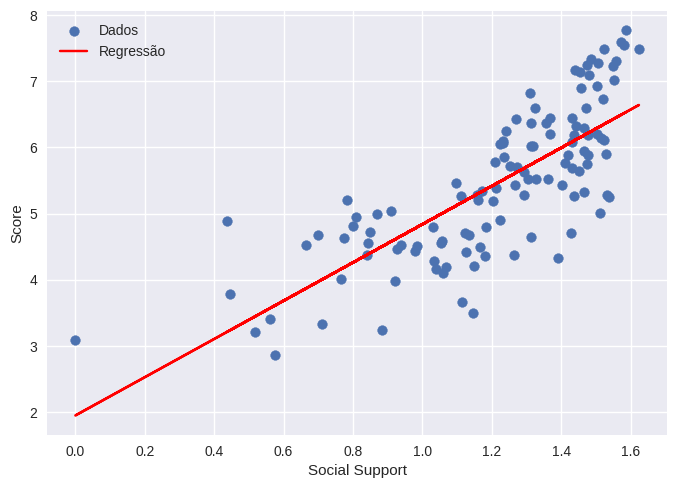

In [47]:
beta1 = fit.params['Social support']
beta0 = fit.params['const']

plt.scatter(x_treino,y_treino, label = 'Dados')
plt.plot(x_treino,beta1*x_treino+beta0, color = 'red', label='Regressão')
plt.legend()
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

Para o erro quadrático médio $\frac{1}{n}\sum_{i=1}^{n} e_i^2 = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$, temos:

In [132]:
print(f'{fit.ssr} / {len(x_treino)}:\n')
print(fit.mse_resid)

59.86778890701457 / 117:

0.5205894687566485


Analisando os resíduos:

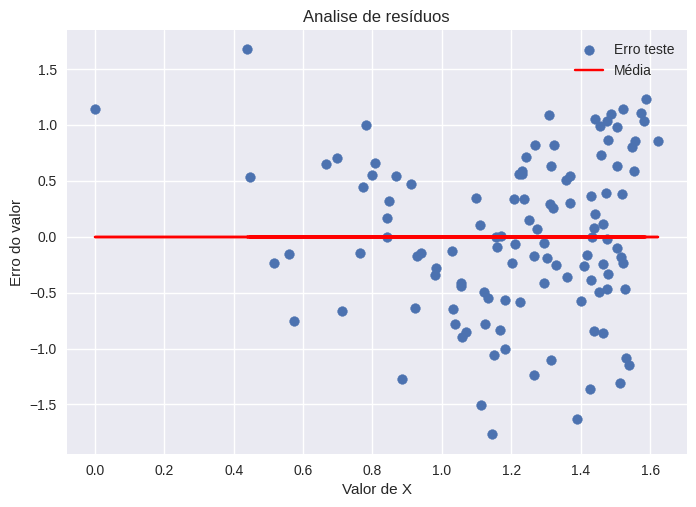

In [ ]:
erros = fit.resid
plt.style.use('seaborn-v0_8')
plt.scatter(x_treino,erros, label = "Erro teste")
plt.plot(x_treino,[np.mean(erros)]*len(x_treino),color="r", label = "Média")
plt.legend()
plt.title('Analise de resíduos')
plt.xlabel('Valor de X')
plt.ylabel('Erro do valor')
plt.show()

## Realizando previsões 🔮 <a class='anchor' id='previsoes'></a> [↑](#top)

Prevendo a felicidade dos valores de teste e comparando os valores reais com os valores previstos:

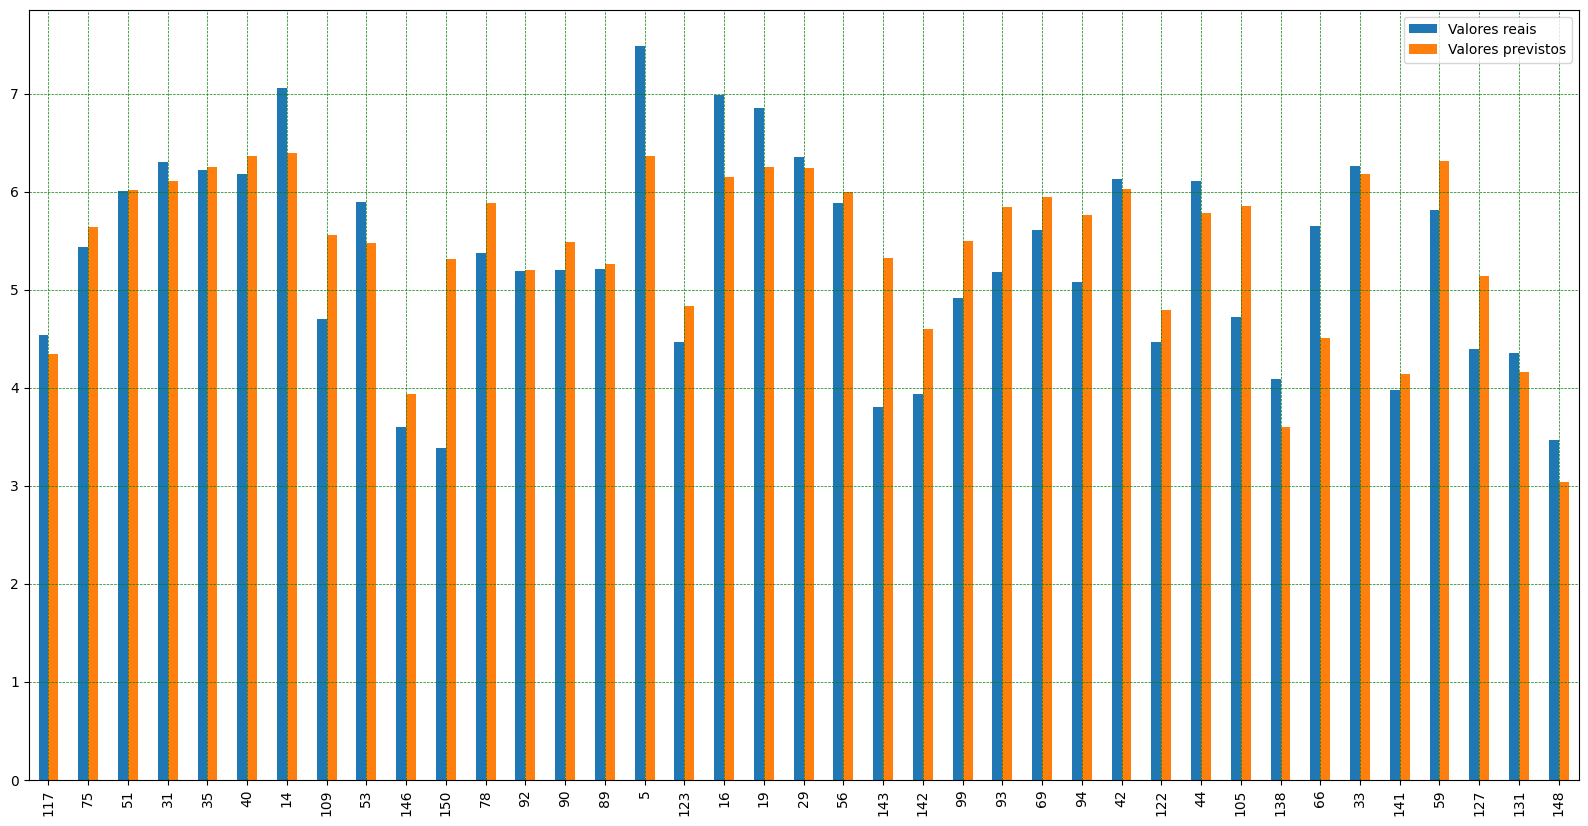

In [126]:
plt.style.use('default')
previsoes = fit.predict(sm.add_constant(x_teste))
comparacoes = pd.DataFrame({'Valores reais': y_teste, 'Valores previstos': previsoes})
comparacoes.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Calculando o erro quadrático médio $\frac{1}{n}\sum_{i=1}^{n} e_i^2 = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$:

In [140]:
print('Erro quadrático médio:', metrics.mean_squared_error(y_teste, previsoes))

Erro quadrático médio: 0.4205262672771182


Como podemos ver, o erro quadrático médio nos valores de teste foi até menor que nos valores de treino. Isso indica que nossa regressão possui um bom poder preditivo para valores fora da amostra de treino.

Fazendo o scatterplot dos valores de teste e seus Y verdadeiros, com o intervalo de confiança de 95% para novas observações dado pela previsão.

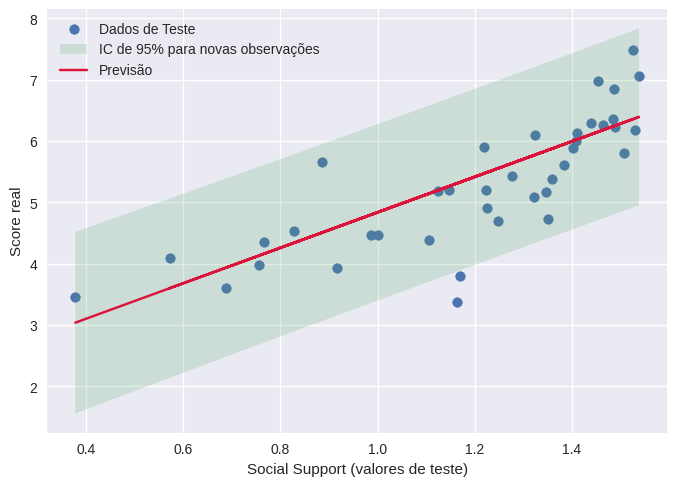

In [149]:
plt.style.use('seaborn-v0_8')
cis = fit.get_prediction(sm.add_constant(x_teste)).summary_frame(alpha=0.05)
plt.scatter(x_teste,y_teste,label='Dados de Teste')
plt.fill_between(np.sort(x_teste), y1=np.sort(cis['obs_ci_lower']), y2=np.sort(cis['obs_ci_upper']), alpha=0.2, label = 'IC de 95% para novas observações')
plt.plot(x_teste, beta1*x_teste+beta0, label='Previsão', color='crimson')
plt.ylabel('Score real')
plt.xlabel('Social Support (valores de teste)')
plt.legend()
plt.show()


Analisando os resíduos:

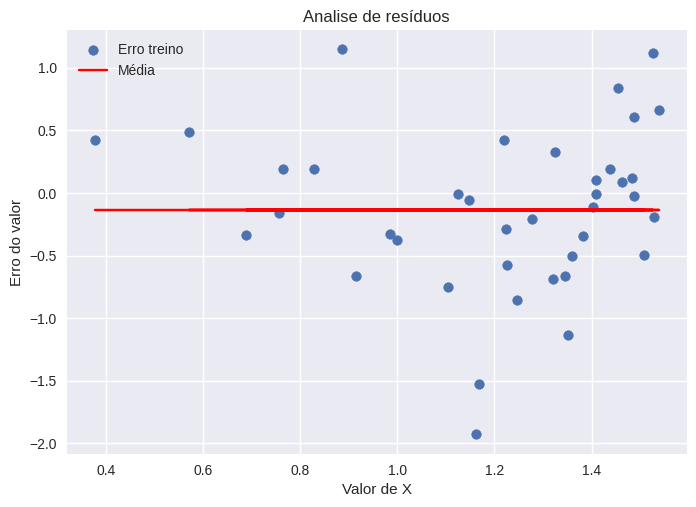

In [150]:
plt.style.use('seaborn-v0_8')
plt.scatter(x_teste,erros, label = "Erro treino")
plt.plot(x_teste,[np.mean(erros)]*len(x_teste),color="r", label = "Média")
plt.legend()
plt.title('Analise de resíduos')
plt.xlabel('Valor de X')
plt.ylabel('Erro do valor')
plt.show()